In [10]:
import pandas as pd
import os

df = pd.read_excel(r'/mnt/c/work/Project_bu_trist/NEW DATA KUESIONER_SRQ20.xlsx', header=None)

#transpose columns
df = df.T
df.columns = df.iloc[0]  
df = df[1:]          

In [11]:
# Replace NaN values with 0 and convert to integer type
df = df.fillna(0).astype(int)

/tmp/ipykernel_1023/1947721011.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0).astype(int)


In [17]:
# Labeling
df['label'] = df.sum(axis=1).apply(lambda x: 1 if x >= 6 else 0)


In [24]:
df.columns

Index(['Apakah Sdr sering sakit kepala?', 'Apakah nafsu makan Sdr menurun?',
       'Apakah Sdr tidak bisa tidur nyenyak?',
       'Apakah Sdr mudah merasa takut?', 'Apakah tangan Sdr gemetar?',
       'Apakah Sdr merasa cemas, tegang, atau khawatir?',
       'Apakah pencernaan Sdr buruk?',
       'Apakah Sdr mengalami kesulitan untuk berfikir jernih?',
       'Apakah Sdr merasa tidak bahagia?',
       'Apakah Sdr lebih sering menangis dari biasanya?',
       'Apakah Sdr sulit menikmati kegiatan sehari-hari?',
       'Apakah Sdr merasa kesulitasn untuk mengambil keputusan?',
       'Apakah hasil kerja sehari-hari Sdr memburuk?',
       'Apakah Sdr merasa tidak bisa melakukan hal yang bermanfaat dalam hidup?',
       'Apakah Sdr kehilangan minat untuk melakukan berbagai macam hal?',
       'Apakah Sdr merasa sebagai orang yang tidak berharga?',
       'Apakah Sdr memiliki pemikiran untuk mengakhiri hidup?',
       'Apakah Sdr merasa lelah sepanjang waktu?',
       'Apakah Sdr merasakan 

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(class_report)



Accuracy: 0.88
Confusion Matrix:
[[30  2]
 [ 8 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.95      0.83      0.89        48

    accuracy                           0.88        80
   macro avg       0.87      0.89      0.87        80
weighted avg       0.89      0.88      0.88        80



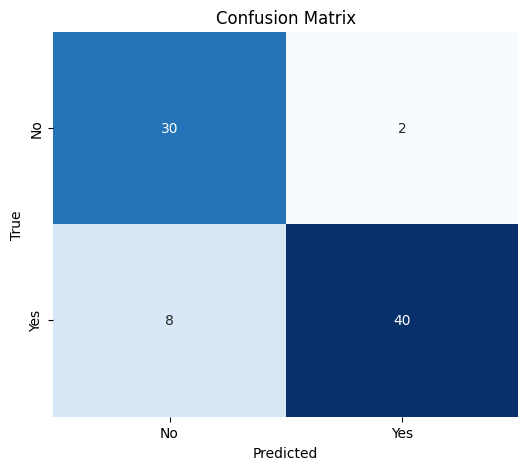

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Trying  hiperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Fully grown trees unless specified
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, digits=2)

# Display the results
print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.95

Confusion Matrix:
[[35  2]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.95      0.95      0.95        43

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [28]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [29]:
# save the model
import joblib

joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']